In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
import seaborn as sns
import pandas as pd
import scipy.special as cb 

# Metoda odwracania dystrybuanty

### Rozkład dyskretny

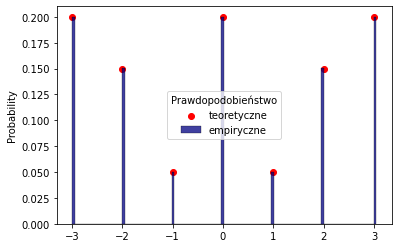

In [2]:
def func_d():
    x = random.uniform(0,1)
    if x<= 0.2:
        return -3
    elif x<= 0.35:
        return -2
    elif x<= 0.4:
        return -1
    elif x<= 0.6:
        return 0
    elif x<= 0.65:
        return 1
    elif x<= 0.8:
        return 2
    else:
        return 3
    
list_d = [func_d() for i in range(10**6)]

sns.histplot(list_d, stat="probability", label="empiryczne", bins=[-3,-2,-1,0,1,2,3], binwidth=0.055, color="navy")
plt.scatter([-3,-2,-1,0,1,2,3], [0.2, 0.15, 0.05, 0.2, 0.05, 0.15, 0.2], color="r", label="teoretyczne")
plt.legend(title="Prawdopodobieństwo")
plt.savefig("dystrybuanta1.pdf", format="pdf", bbox_inches="tight")

<AxesSubplot:ylabel='Proportion'>

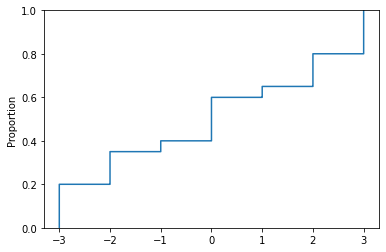

In [3]:
sns.ecdfplot(list_d)

### Rozkład ciągły - Exp(1/4)

In [4]:
lam = 1/4

In [5]:
list_U = [random.uniform(0,1) for i in range(10**5)]
E = scipy.stats.expon(0, 1/lam)

list_ppf = [E.ppf(i) for i in list_U]

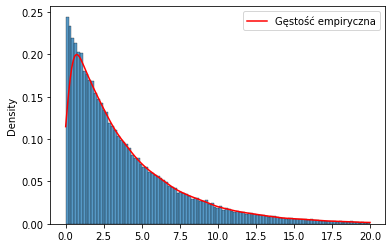

In [6]:
sns.histplot(list_ppf, stat="density", binrange=(0,20))
sns.kdeplot(list_ppf, color='r', clip=(0,20), label="Gęstość empiryczna")
plt.legend()
plt.savefig("dystrybuanta2.pdf", format="pdf", bbox_inches="tight")

In [7]:
df_ppf = pd.DataFrame(list_ppf).describe()
df_ppf = df_ppf.assign(newcol=[len(list_ppf), 
                               1/lam, 
                               1/lam, 
                               np.NaN, 
                               np.log(4/3)/lam, 
                               np.log(2)/lam, 
                               np.log(4)/lam, 
                               np.NaN])
df_ppf.columns = ["Wartości empiryczne", "Wartości teoretyczne"]
df_ppf

,Wartości empiryczne,Wartości teoretyczne
count,100000.000000,100000.000000
mean,4.005721,4.000000
std,4.011701,4.000000
min,0.000047,NaN
25%,1.152074,1.150728
50%,2.762430,2.772589
75%,5.557337,5.545177
max,46.470686,NaN


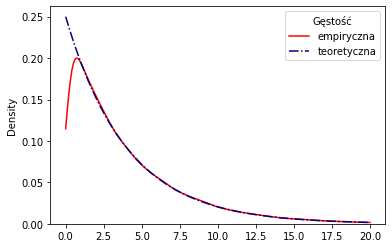

In [8]:
sns.kdeplot(list_ppf, label="empiryczna", color="red", clip=(0,20))

plt.plot(np.arange(0, 20, 0.01), 
         [lam*np.e**(-lam*i) for i in np.arange(0,20,0.01)], 
         label="teoretyczna", 
         linestyle='-.',
         color="navy")

#plt.title("Density comparison")
plt.legend(title="Gęstość")
plt.savefig("dystrybuanta3.pdf", format="pdf", bbox_inches="tight")

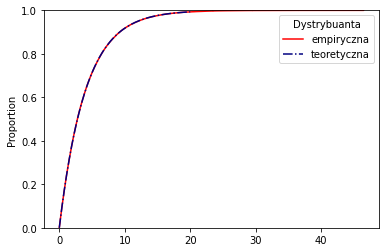

In [9]:
sns.ecdfplot(list_ppf, label="empiryczna", color="red")

plt.plot(np.arange(0, 20, 0.01), 
         [1-np.e**(-lam*i) for i in np.arange(0,20,0.01)], 
         label="teoretyczna",
         linestyle='-.',
         color="navy")

#plt.title("Distribution comparison")
plt.legend(title="Dystrybuanta")
plt.savefig("dystrybuanta4.pdf", format="pdf", bbox_inches="tight")

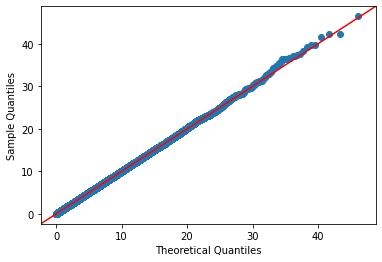

In [10]:
sm.qqplot(np.array(list_ppf), dist=scipy.stats.expon(0, 1/lam), line='45');
plt.savefig("dystrybuanta5.pdf", format="pdf", bbox_inches="tight")

# Metoda Boxa-Müllera

In [11]:
mi = 1
sigma = 2

In [12]:
def Box_Muller(n, mi,sigma):
    
    U1 = np.random.uniform(0,1,n)
    U2 = np.random.uniform(0,1,n)

    # tworzenie niezależnych zmiennych losowych z rozkładu N(0,1)
    N1 = np.sqrt(-2*np.log(U1)) * np.cos(2*np.pi*U2)
    N2 = np.sqrt(-2*np.log(U1)) * np.sin(2*np.pi*U2)

    # transformacja liniowa zmiennych losowych
    X = sigma*N1+mi
    Y = sigma*N2+mi
    
    values = np.concatenate((X,Y))
    
    return values

In [13]:
arr = Box_Muller(10**5, mi,sigma)
print(len(arr))

200000


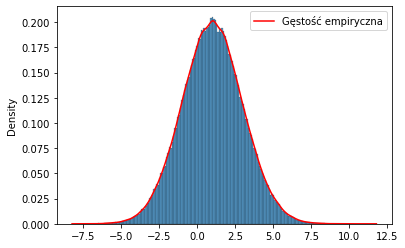

In [14]:
histogram = sns.histplot(arr, stat="density")
sns.kdeplot(arr, color='r', label="Gęstość empiryczna")
plt.legend()
plt.savefig("bm1.pdf", format="pdf", bbox_inches="tight")

In [15]:
df_ppf = pd.DataFrame(arr).describe()
df_ppf = df_ppf.assign(newcol=[len(arr), 
                               mi, 
                               sigma, 
                               np.NaN, 
                               mi - 0.675*sigma, 
                               mi, 
                               mi + 0.675*sigma, 
                               np.NaN])
df_ppf.columns = ["Wartości empiryczne", "Wartości teoretyczne"]
df_ppf

,Wartości empiryczne,Wartości teoretyczne
count,200000.000000,200000.00
mean,0.995946,1.00
std,2.000733,2.00
min,-7.724704,NaN
25%,-0.349892,-0.35
50%,0.993100,1.00
75%,2.331517,2.35
max,11.279303,NaN


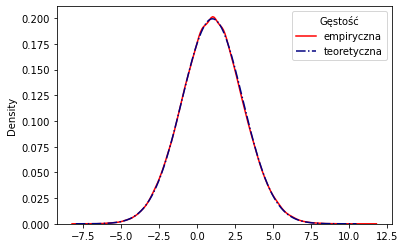

In [16]:
sns.kdeplot(arr, label="empiryczna", color="red")

plt.plot(np.arange(-8,10.5,0.01), 
         [1/(sigma*np.sqrt(2*np.pi))*np.e**(-(i-mi)**2/(2*sigma**2)) for i in np.arange(-8,10.5,0.01)], 
         label="teoretyczna",
         linestyle='-.',
         color="navy")

#plt.title("Density comparison")
plt.legend(title="Gęstość")
plt.savefig("bm2.pdf", format="pdf", bbox_inches="tight")

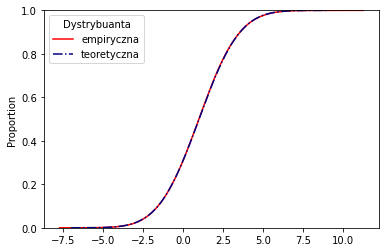

In [17]:
sns.ecdfplot(arr, label="empiryczna", color="red")

plt.plot(np.arange(mi-4*sigma,mi+4*sigma,0.01), 
         [1/2*(1+scipy.special.erf((i-mi)/(sigma*np.sqrt(2)))) for i in np.arange(mi-4*sigma,mi+4*sigma,0.01)], 
         label="teoretyczna",
         linestyle='-.',
         color="navy")

#plt.title("Distribution comparison")
plt.legend(title="Dystrybuanta", loc="upper left")
plt.savefig("bm3.pdf", format="pdf", bbox_inches="tight")

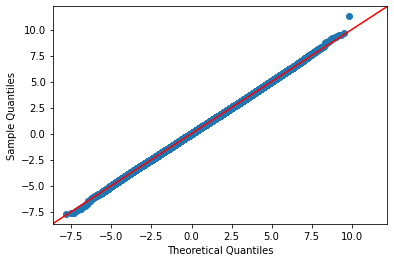

In [18]:
sm.qqplot(arr, dist=scipy.stats.norm(mi, sigma), line='45');
plt.savefig("bm4.pdf", format="pdf", bbox_inches="tight")

# Metoda Boxa-Müllera biegunowa

In [19]:
def polarBM(n, mi, sigma):
    
    arr_n = np.ndarray(n)
    U3_ok = np.ndarray(n)
    U4_ok = np.ndarray(n)
    count = 0
    
    while count<n:
        U3 = random.uniform(-1,1)
        U4 = random.uniform(-1,1)
        
        R = U3**2 + U4**2
        
        if R<1:
            U3_ok[count] = U3
            U4_ok[count] = U4
            arr_n[count] = R
            count += 1
    
    # tworzenie dwóch tablic niezależnych zmiennych losowych z rozkładu N(0,1)
    N3 = np.sqrt(-2*np.log(arr_n)*1/arr_n)*U3_ok
    N4 = np.sqrt(-2*np.log(arr_n)*1/arr_n)*U4_ok
    
    # transformacja liniowa zmiennych losowych z tych dwóch tablic
    W = sigma*N3+mi
    Z = sigma*N4+mi
    
    values_p = np.concatenate((W,Z))
    
    return values_p

In [20]:
arr_p = polarBM(10**5, mi,sigma)
len(arr_p)

200000

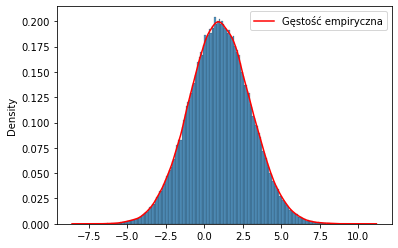

In [21]:
histogram_p = sns.histplot(arr_p, stat="density")
sns.kdeplot(arr_p, color='r', label="Gęstość empiryczna")
plt.legend()
plt.savefig("bmb1.pdf", format="pdf", bbox_inches="tight")

In [22]:
df_ppf = pd.DataFrame(arr_p).describe()
df_ppf = df_ppf.assign(newcol=[len(arr_p), 
                               mi, 
                               sigma, 
                               np.NaN, 
                               mi - 0.675*sigma, 
                               mi, 
                               mi + 0.675*sigma, 
                               np.NaN])
df_ppf.columns = ["Wartości empiryczne", "Wartości teoretyczne"]
df_ppf

,Wartości empiryczne,Wartości teoretyczne
count,200000.000000,200000.00
mean,0.997997,1.00
std,1.996308,2.00
min,-8.065759,NaN
25%,-0.346724,-0.35
50%,0.988240,1.00
75%,2.337184,2.35
max,10.656476,NaN


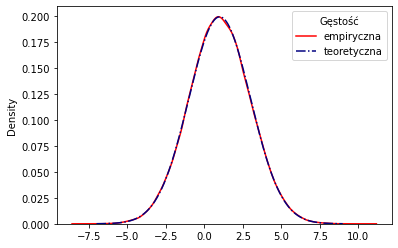

In [23]:
sns.kdeplot(arr_p, label="empiryczna", color="red")

plt.plot(np.arange(mi-4*sigma,mi+4*sigma,0.01), 
         [1/(sigma*np.sqrt(2*np.pi))*np.e**(-(i-mi)**2/(2*sigma**2)) for i in np.arange(mi-4*sigma,mi+4*sigma,0.01)], 
         label="teoretyczna",
         linestyle='-.',
         color="navy")

#plt.title("Density comparison")
plt.legend(title="Gęstość")
plt.savefig("bmb2.pdf", format="pdf", bbox_inches="tight")

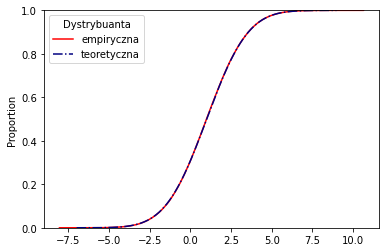

In [24]:
sns.ecdfplot(arr_p, label="empiryczna", color="red")

plt.plot(np.arange(mi-4*sigma,mi+4*sigma,0.01), 
         [1/2*(1+scipy.special.erf((i-mi)/(sigma*np.sqrt(2)))) for i in np.arange(mi-4*sigma,mi+4*sigma,0.01)], 
         label="teoretyczna",
         linestyle='-.',
         color="navy")

#plt.title("Distribution comparison")
plt.legend(title="Dystrybuanta", loc="upper left")
plt.savefig("bmb3.pdf", format="pdf", bbox_inches="tight")

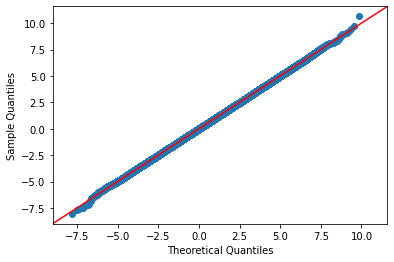

In [25]:
sm.qqplot(arr_p, dist=scipy.stats.norm(mi, sigma), line='45');
plt.savefig("bmb4.pdf", format="pdf", bbox_inches="tight")

# Liniowy generator kongruentny (LCG)

In [26]:
def lcg(a,c,m, n):
    list2 = []
    x=80
    list2.append(x/m)
    
    for i in range(n):
        xn = (a*x+c) % m
        list2.append(xn/m)
        x = xn
        
    return list2

list_lcg = lcg(68231,9,2**34, 10**6-1)

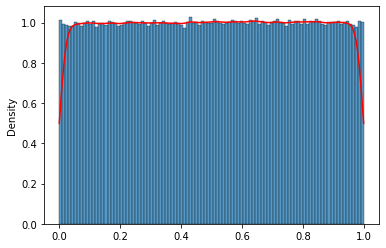

In [27]:
sns.histplot(list_lcg, stat="density")
sns.kdeplot(list_lcg, color="r", clip=(0,1))
plt.savefig("lcg1.pdf", format="pdf", bbox_inches="tight")

In [28]:
df_lcg = pd.DataFrame(list_lcg).describe().apply(lambda s: s.apply('{0:.5f}'.format))
df_lcg = df_lcg.assign(newcol=[len(list_lcg), 
                               0.5, 
                               np.sqrt(1/12), 
                               np.NaN, 
                               0.25, 
                               0.5, 
                               0.75, 
                               np.NaN])
df_lcg.columns = ["Wartości empiryczne", "Wartości teoretyczne"]
df_lcg

,Wartości empiryczne,Wartości teoretyczne
count,1000000.00000,1000000.000000
mean,0.50053,0.500000
std,0.28844,0.288675
min,0.00000,NaN
25%,0.25087,0.250000
50%,0.50111,0.500000
75%,0.75037,0.750000
max,1.00000,NaN


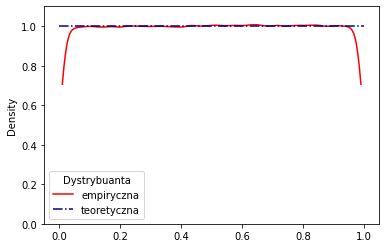

In [29]:
sns.kdeplot(list_lcg, label="empiryczna", color="red", clip=(0.01,0.99))

plt.plot(np.arange(0,1,0.001), 
         [1 for i in np.arange(0,1,0.001)], 
         label="teoretyczna",
         linestyle='-.',
         color="navy")

plt.ylim([0,1.1])
plt.legend(title="Dystrybuanta")
plt.savefig("lcg2.pdf", format="pdf", bbox_inches="tight")

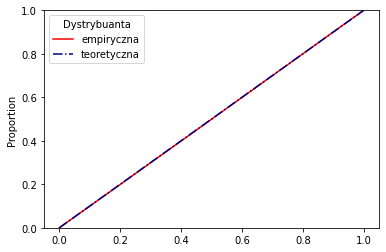

In [30]:
sns.ecdfplot(list_lcg, label="empiryczna", color="red")

plt.plot(np.arange(0,1,0.001), 
         [i for i in np.arange(0,1,0.001)], 
         label="teoretyczna",
         linestyle='-.',
         color="navy")

#plt.title("Distribution comparison")
plt.legend(title="Dystrybuanta", loc="upper left")
plt.savefig("lcg3.pdf", format="pdf", bbox_inches="tight")

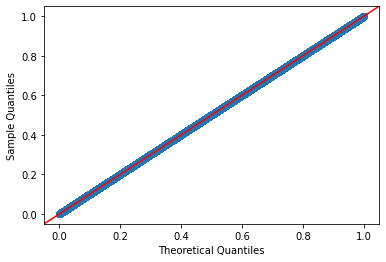

In [31]:
sm.qqplot(np.array(list_lcg), dist=scipy.stats.uniform(0, 1), line='45');
plt.savefig("lcg4.pdf", format="pdf", bbox_inches="tight")

# Metoda akceptacji-odrzucenia

### Rozkład dyskretny

In [32]:
def pdf_ao(x):
    if x == 1:
        return 0.15
    elif x == 2:
        return 0.09
    elif x == 3:
        return 0.04
    elif x == 4:
        return 0.12
    elif x == 5:
        return 0.18
    elif x == 6:
        return 0.12
    elif x == 7:
        return 0.04
    elif x == 8:
        return 0.09
    elif x == 9:
        return 0.15
    
    
c = 0.18*9
        
def check():
    U = random.uniform(0,1)
    Y = np.ceil(random.uniform(0,1)*9)
    
    while U > pdf_ao(Y)/(c*(1/9)):
        U = random.uniform(0,1)
        Y = np.ceil(random.uniform(0,1)*9)
    return Y

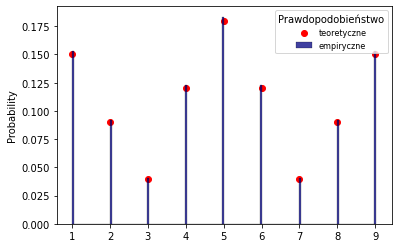

In [33]:
list_aod = [check() for i in range(10**6)]

sns.histplot(list_aod, stat="probability", label="empiryczne", bins=[-3,-2,-1,0,1,2,3], binwidth=0.055, color="navy")
plt.scatter([1,2,3,4,5,6,7,8,9], 
            [0.15, 0.09, 0.04, 0.12, 0.18, 0.12, 0.04, 0.09, 0.15], color="r", label="teoretyczne")
plt.legend(title="Prawdopodobieństwo", prop={'size':8})
plt.savefig("ao1.pdf", format="pdf", bbox_inches="tight")

### Rozkład ciągły 

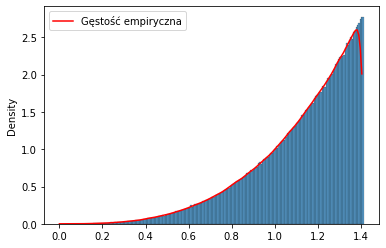

In [34]:
def odrzucenie_akceptacja(f,g,c,n):
    list_ao=[]
    while len(list_ao)<n:
        u=np.random.sample()
        y=2**0.5*np.random.sample()
        if u<(f(y))/(c*g(y)):
            list_ao.append(y)
    return list_ao
def f(x):
    return x**3
def g(x):
    return 1/2**0.5

list_ao = odrzucenie_akceptacja(f,g,4,10**6)
t = np.linspace(np.min(list_ao),np.max(list_ao))

sns.histplot(list_ao, stat="density")
sns.kdeplot(list_ao, color='r', clip=(0,1.405), label="Gęstość empiryczna")
plt.legend()
plt.savefig("ao2.pdf", format="pdf", bbox_inches="tight")

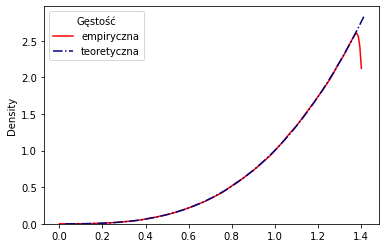

In [35]:
sns.kdeplot(list_ao, label="empiryczna", color='r', clip=(0,1.403))

plt.plot(t,f(t),label="teoretyczna", linestyle='-.', color="navy")

plt.legend(title="Gęstość")

plt.savefig("ao3.pdf", format="pdf", bbox_inches="tight")

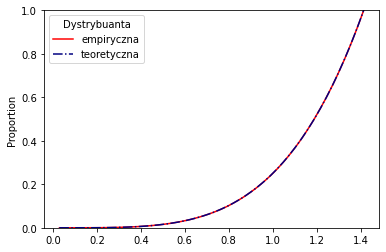

In [36]:
sns.ecdfplot(list_ao, label="empiryczna", color="red")

plt.plot(t, 
         [i**4/4 for i in t], 
         label="teoretyczna",
         linestyle='-.',
         color="navy")

plt.legend(title="Dystrybuanta", loc="upper left")
plt.savefig("ao4.pdf", format="pdf", bbox_inches="tight")

# Metoda splotowa

### Rozkład dyskretny

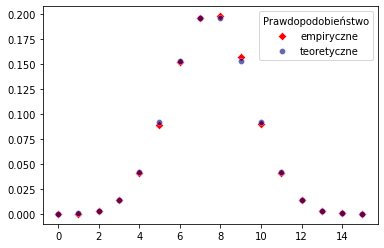

In [37]:
def data_plot(x,n):  
    dict={int(u): np.count_nonzero(x==u)/n for u in set(x)}
    max_k=max(dict.keys())
    for y in range(1,max_k):
        if  y not in dict.keys():
            dict[y]=0
    a=sorted(list(dict.keys()))
    b=[dict[v] for v in a]
    c=[cb.comb(15,k)*(1/2)**15 for k in a]
    return a,b,c


def bernoulli(k,n):
    x=np.zeros(n)
    for i in range(n):
        suma=0
        for j in range(k):
            suma+=np.random.choice([0,1])
        x[i]=suma
    return x

x=bernoulli(15,100000)

a,b,c=data_plot(x,100000)
sns.scatterplot(x=a,y=b,label="empiryczne", marker="D", color="r")
sns.scatterplot(x=a,y=c,label="teoretyczne", color="navy", alpha=0.6)

plt.legend(title="Prawdopodobieństwo")
plt.savefig("splot1.pdf", format="pdf", bbox_inches="tight")

# Rozkład ciągły

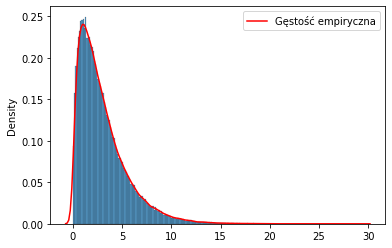

In [38]:
def chikwadrat(k,n):
    U = scipy.stats.norm().rvs((k, n))
    X = np.sum(U**2, axis=0)
    return X

def normsplotowa(k,n):
    U = 5+3*scipy.stats.norm().rvs((k, n))
    X = np.sum(U, axis=0)
    return X

Z=chikwadrat(3,100000)
x=np.linspace(np.min(Z),np.max(Z),100000)

sns.histplot(Z, stat="density")
sns.kdeplot(Z, color='r', label="Gęstość empiryczna")
plt.legend()

plt.savefig("splot2.pdf", format="pdf", bbox_inches="tight")

In [39]:
df_chi = pd.DataFrame(Z).describe()
df_chi = df_chi.assign(newcol=[len(Z), 
                               3, 
                               np.sqrt(2*3), 
                               np.NaN, 
                               1.21253, 
                               2.36597, 
                               4.10835, 
                               np.NaN])
df_chi.columns = ["Wartości empiryczne", "Wartości teoretyczne"]
df_chi

,Wartości empiryczne,Wartości teoretyczne
count,100000.000000,100000.00000
mean,2.997937,3.00000
std,2.459176,2.44949
min,0.000400,NaN
25%,1.205588,1.21253
50%,2.357408,2.36597
75%,4.093422,4.10835
max,29.432478,NaN


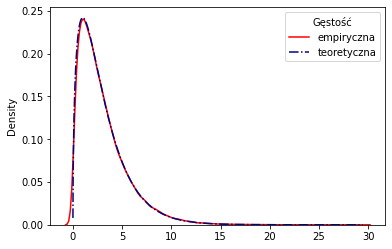

In [40]:
sns.kdeplot(Z, label="empiryczna", color='r')

plt.plot(x, scipy.stats.chi2.pdf(x, df=3), 
         label="teoretyczna", 
         linestyle='-.',
         color="navy")


plt.legend(title="Gęstość")
plt.savefig("splot3.pdf", format="pdf", bbox_inches="tight")

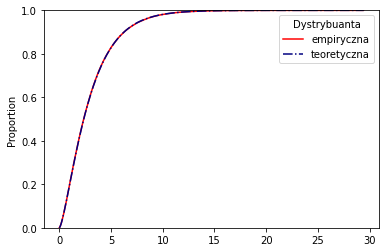

In [41]:
sns.ecdfplot(Z, label="empiryczna", color='r')

plt.plot(x, scipy.stats.chi2.cdf(x, df=3), 
         label="teoretyczna", 
         linestyle='-.',
         color="navy")

plt.legend(title="Dystrybuanta")
plt.savefig("splot4.pdf", format="pdf", bbox_inches="tight")

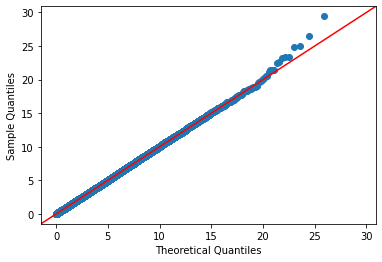

In [42]:
sm.qqplot(Z, dist=scipy.stats.chi2(df=3), line='45');
plt.savefig("splot5.pdf", format="pdf", bbox_inches="tight")

# Metoda kompozycji

### Rozkład ciągły

In [43]:
#nie wiem skąd wziąsć tu rozkład teoretyczny bo nie ma ale za to średnią i wariancje możemy porównać z https://en.wikipedia.org/wiki/Hyperexponential_distribution

def exp(lam,n):
    U=np.random.sample(n)
    x=(-1/lam *np.log(1-U))
    return x


def hiperexp(p,lam,n):
    x=np.zeros(n)
    for j in range(n):
        u=np.random.sample()
        for i in range(len(p)):
            if u<p[i]:
                U=np.random.sample()
                x[j]=(-1/lam[i] *np.log(1-U))
                break
    return x 



x=hiperexp([0.3,0.5,0.2],[3,0.9,0.8],100000)
t=np.linspace(np.min(x),np.max(x),100000)


def f(t):
    return 0.3*3*np.e**(-3*t) + 0.5*0.9*np.e**(-0.9*t) + 0.2*0.8*np.e**(-0.8*t)

def cdf_kompozycji(t):
    return -0.2*np.exp(-0.2*t)-0.2*np.exp(-0.1*t)-0.4*np.exp(-t)

In [44]:
min(x)

0.0

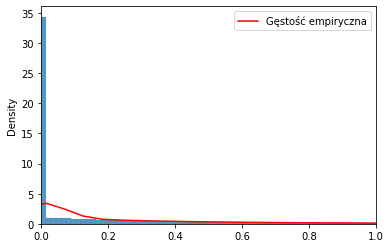

In [45]:
sns.histplot(x, stat="density")
sns.kdeplot(x, color='r', label="Gęstość empiryczna")

plt.xlim(0,1)
plt.legend()

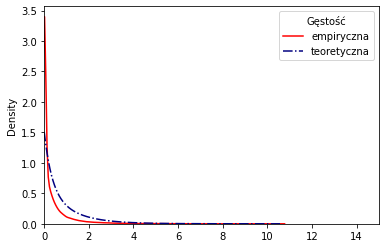

In [46]:
sns.kdeplot(x, color='r', label="empiryczna")

plt.plot(t,f(t), 
         label="teoretyczna", 
         linestyle='-.',
         color="navy")

plt.xlim(0,15)
plt.legend(title="Gęstość");

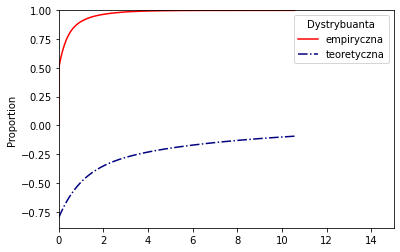

In [47]:
sns.ecdfplot(x, color='r', label="empiryczna")

plt.plot(t, cdf_kompozycji(t), 
         label="teoretyczna", 
         linestyle='-.',
         color="navy")

plt.xlim(0,15)
plt.legend(title="Dystrybuanta");

In [10]:
import seaborn as sns
import math

sns.set()
def laplace(l,m, n):
    X=[]
    for i in range(n):
        u=random.random()
        p=random.random()
        if p<=0.5:
            X.append(1/l*(np.log(u)) + m)
        else:
            X.append(-1/l*(np.log(u)) + m)
    return X
X=laplace(1,6, 1000000)

def lap(X,l,m):
    return (1/(2*l))*math.e**(-abs(X-m)/l)

def dys(X,l,m):
    return (1/2)*math.e**((X-m)/l)

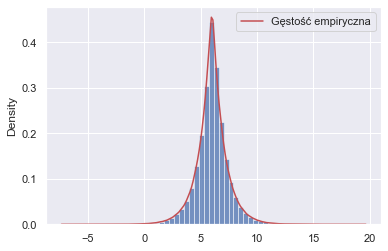

In [12]:
sns.histplot(X,  stat="density", bins=60)
sns.kdeplot(X, color='r', label="Gęstość empiryczna")

plt.legend()
plt.savefig('kompozycja1.pdf', format="pdf", bbox_inches="tight")

In [ ]:
a=sns.kdeplot(X, label='gęstość empiryczna', color='r')

def lap(X,l,m):
    return (1/(2*l))*math.e**(-abs(X-m)/l)
lin = np.linspace(-7, 20, 10000)
plt.plot(lin, lap(lin,1,6), label = 'gęstość teoretyczna', 
         linestyle='-.',
         color="navy")
plt.legend()


a.legend(loc="best")
plt.savefig('kompozycja2.pdf')